# Molecule analysis Stage 2

In [1]:
#seperate FP analysis
# make sure that data stored is easy (formate etc.) to access and read

# Experiment Imports / Functions: 

In [22]:
import time 
import selfies
import rdkit
import random
import numpy as np
import random
from rdkit import Chem
from selfies import encoder, decoder
from rdkit.Chem import MolFromSmiles as smi2mol
from rdkit.Chem import AllChem
from rdkit.DataStructs.cDataStructs import TanimotoSimilarity
from rdkit.Chem import Mol
from rdkit.Chem.AtomPairs.Sheridan import GetBPFingerprint, GetBTFingerprint
from rdkit.Chem.Pharm2D import Generate, Gobbi_Pharm2D
from rdkit.Chem import Draw
from rdkit.Chem.Descriptors import NumRadicalElectrons

from rdkit.Chem import MolToSmiles as mol2smi
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*')

import Stoned

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import pickle

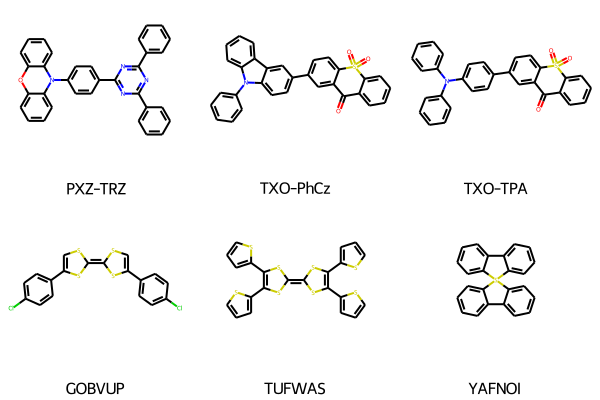

In [24]:
smi_dict = pickle.load(open("Mol_list_to_mutate.pkl",'rb'))
parent_mol_names = [key for key in smi_dict.keys()]
#smi -> mol
mols = [Chem.MolFromSmiles(smi) for smi in smi_dict.values()]
legends = [name for name in smi_dict.keys()]
img=Draw.MolsToGridImage(mols,molsPerRow=3,legends=legends)
img

In [25]:
parent_data = pickle.load(open("parent_data.pkl",'rb'))
pd.DataFrame(parent_data)

molecule  n_atoms                                             SMILES  \
0   PXZ-TRZ       38  c7ccc(c6nc(c1ccccc1)nc(c5ccc(n4c2ccccc2oc3cccc...   
1  TXO-PhCz       36  O=C6c1ccccc1S(=O)(=O)c7ccc(c2ccc4c(c2)c3ccccc3...   
2   TXO-TPA       36  O=C5c1ccccc1S(=O)(=O)c6ccc(c4ccc(N(c2ccccc2)c3...   
3    GOBVUP       24        Clc4ccc(c3csc(=c2scc(c1ccc(Cl)cc1)s2)s3)cc4   
4    TUFWAS       30  c6csc(c4sc(=c3sc(c1cccs1)c(c2cccs2)s3)sc4c5ccc...   
5    YAFNOI       25            c1ccc3c(c1)c2ccccc2S36c4ccccc4c5ccccc56   

   Unique_molecues  SMILES_generated  
0             3769            135000  
1             3325            115000  
2             3210            135000  
3             2247             95000  
4             3026            105000  
5             1925            105000

# SYBA

In [26]:
# set up SYBA Score calculator
from syba.syba import SybaClassifier
syba = SybaClassifier()
syba.fitDefaultScore()

In [27]:
# smis = [smi for smi in parent_data['SMILES']]
parent_data['SYBA'] = [syba.predict(smi=smi) for smi in parent_data['SMILES']]

In [28]:
pickle.dump(parent_data,open("parent_data.pkl",'wb'))
pd.DataFrame(parent_data)

molecule  n_atoms                                             SMILES  \
0   PXZ-TRZ       38  c7ccc(c6nc(c1ccccc1)nc(c5ccc(n4c2ccccc2oc3cccc...   
1  TXO-PhCz       36  O=C6c1ccccc1S(=O)(=O)c7ccc(c2ccc4c(c2)c3ccccc3...   
2   TXO-TPA       36  O=C5c1ccccc1S(=O)(=O)c6ccc(c4ccc(N(c2ccccc2)c3...   
3    GOBVUP       24        Clc4ccc(c3csc(=c2scc(c1ccc(Cl)cc1)s2)s3)cc4   
4    TUFWAS       30  c6csc(c4sc(=c3sc(c1cccs1)c(c2cccs2)s3)sc4c5ccc...   
5    YAFNOI       25            c1ccc3c(c1)c2ccccc2S36c4ccccc4c5ccccc56   

   Unique_molecues  SMILES_generated       SYBA  
0             3769            135000  36.220805  
1             3325            115000  27.806475  
2             3210            135000  49.425950  
3             2247             95000  -2.196499  
4             3026            105000  18.543954  
5             1925            105000  18.541930

In [29]:
the_data = (pickle.load(open("the_data_NEW.pkl",'rb')))
pd.DataFrame(the_data)

Family    Mol_names  fp_scores  \
0      PXZ-TRZ    PXZ-TRZ_1   0.714286   
1      PXZ-TRZ    PXZ-TRZ_2   0.393939   
2      PXZ-TRZ    PXZ-TRZ_3   0.477707   
3      PXZ-TRZ    PXZ-TRZ_4   0.234973   
4      PXZ-TRZ    PXZ-TRZ_5   0.445161   
...        ...          ...        ...   
17497   YAFNOI  YAFNOI_1921   0.551020   
17498   YAFNOI  YAFNOI_1922   0.403846   
17499   YAFNOI  YAFNOI_1923   0.416667   
17500   YAFNOI  YAFNOI_1924   0.416667   
17501   YAFNOI  YAFNOI_1925   0.401869   

                                                  SMILES  N_atoms shell_type  
0      C1=CPC2C(=C1)Oc1ccccc1N2c1ccc(-c2nc(-c3ccccc3)...       38     closed  
1      FC=CC(=CC=CC1C=C2C=CSC(=C2)C=NC(c2ccccc2)=N1)N...       39     closed  
2      C=Cc1ccsc1CN=NC(=NC(=N)c1ccc(N2c3ccccc3Oc3cccc...       40     closed  
3      NC1=CC=CCC(C=CC=CCBr)(N=CC2=CC=CC=CS2)c2ccccc2...       38     closed  
4      CCN=CC1C=CC=CN=C(c2ccc(N3c4ccccc4Oc4ccccc43)cc...       37     closed  
...                                                  ...      ...        ...  
17497        C=C1C=C2c3ccccc3S3(c4ccccc4-c4ccccc43)C2OC1       26     closed  
17498           C=CC1=CC1c1ccccc1[SH]1c2ccccc2-c2ccccc21       24     closed  
17499      C1=CSC(=Cc2ccccc2[SH]2c3ccccc3-c3ccccc32)C=C1       26     closed  
17500  C1=CC(=Cc2ccccc2)C([SH]2c3ccccc3-c3ccccc32)=C[...       26     closed  
17501      C1=CC=CC=CS2(C=CC=CC[O+]=1)c1ccccc1-c1ccccc12       25     closed  

[17502 rows x 6 columns]

In [30]:
the_data['SYBA'] = [syba.predict(smi=smi) for smi in the_data['SMILES']]

In [31]:
pd.DataFrame(the_data)

Family    Mol_names  fp_scores  \
0      PXZ-TRZ    PXZ-TRZ_1   0.714286   
1      PXZ-TRZ    PXZ-TRZ_2   0.393939   
2      PXZ-TRZ    PXZ-TRZ_3   0.477707   
3      PXZ-TRZ    PXZ-TRZ_4   0.234973   
4      PXZ-TRZ    PXZ-TRZ_5   0.445161   
...        ...          ...        ...   
17497   YAFNOI  YAFNOI_1921   0.551020   
17498   YAFNOI  YAFNOI_1922   0.403846   
17499   YAFNOI  YAFNOI_1923   0.416667   
17500   YAFNOI  YAFNOI_1924   0.416667   
17501   YAFNOI  YAFNOI_1925   0.401869   

                                                  SMILES  N_atoms shell_type  \
0      C1=CPC2C(=C1)Oc1ccccc1N2c1ccc(-c2nc(-c3ccccc3)...       38     closed   
1      FC=CC(=CC=CC1C=C2C=CSC(=C2)C=NC(c2ccccc2)=N1)N...       39     closed   
2      C=Cc1ccsc1CN=NC(=NC(=N)c1ccc(N2c3ccccc3Oc3cccc...       40     closed   
3      NC1=CC=CCC(C=CC=CCBr)(N=CC2=CC=CC=CS2)c2ccccc2...       38     closed   
4      CCN=CC1C=CC=CN=C(c2ccc(N3c4ccccc4Oc4ccccc43)cc...       37     closed   
...                                                  ...      ...        ...   
17497        C=C1C=C2c3ccccc3S3(c4ccccc4-c4ccccc43)C2OC1       26     closed   
17498           C=CC1=CC1c1ccccc1[SH]1c2ccccc2-c2ccccc21       24     closed   
17499      C1=CSC(=Cc2ccccc2[SH]2c3ccccc3-c3ccccc32)C=C1       26     closed   
17500  C1=CC(=Cc2ccccc2)C([SH]2c3ccccc3-c3ccccc32)=C[...       26     closed   
17501      C1=CC=CC=CS2(C=CC=CC[O+]=1)c1ccccc1-c1ccccc12       25     closed   

             SYBA  
0      -46.560050  
1     -114.606299  
2       -2.852969  
3     -182.156780  
4     -122.860454  
...           ...  
17497  -30.960460  
17498  -34.616466  
17499  -46.327961  
17500   -9.460602  
17501  -32.985463  

[17502 rows x 7 columns]

In [32]:
img_dpi=300

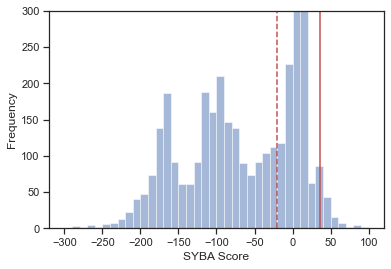

PXZ-TRZ


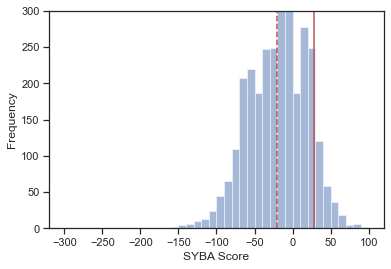

TXO-PhCz


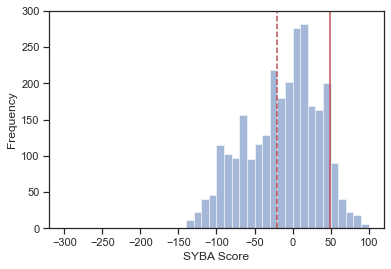

TXO-TPA


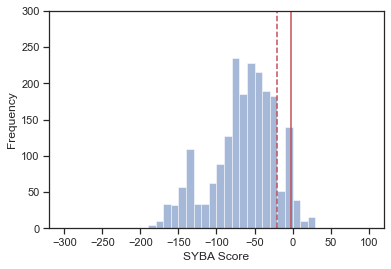

GOBVUP


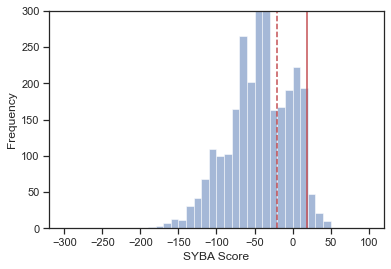

TUFWAS


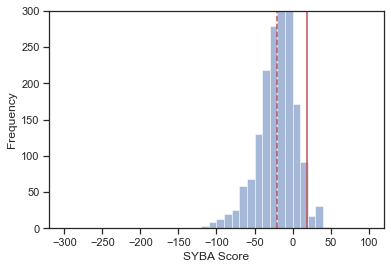

YAFNOI


In [33]:
# fig, axs = plt.subplots(2, len(smi_dict))
for i,family in enumerate(parent_data['molecule']):
    
    #atom thresh
    thresh = parent_data['n_atoms'][i] - 10
    
    df = pd.DataFrame(the_data).query("Family == @family").query("N_atoms >= @thresh")#.query("shell_type == 'closed'")

    bins = np.arange(-300,110, 10)

    df['SYBA'].plot.hist(alpha=0.5,ylim=(0,300),bins=bins)
    plt.axvline(x=parent_data['SYBA'][i],color='r',label='Parent Molecule')
    plt.axvline(x=-20,label='SYBA -20',color='r',ls='--')
    plt.xlabel('SYBA Score')
#     plt.title(family)
#     plt.legend()
    plt.savefig('Images/hist_SYBA_'+family+'_FILTERED.png', bbox_inches='tight',dpi=img_dpi)
    plt.show()
    print(family)

In [34]:
import seaborn as sns

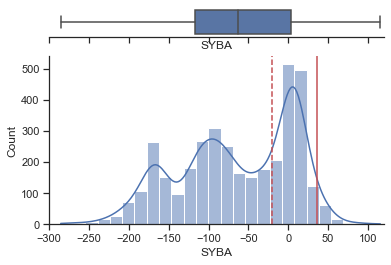

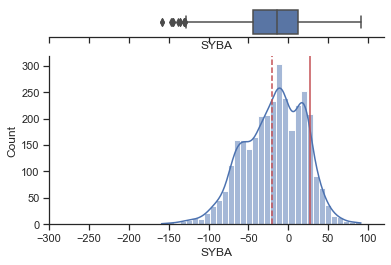

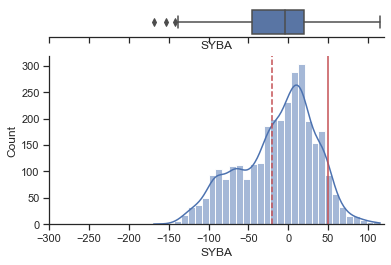

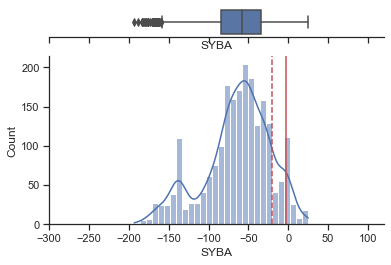

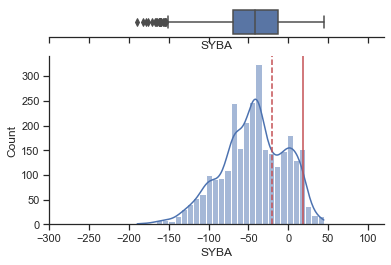

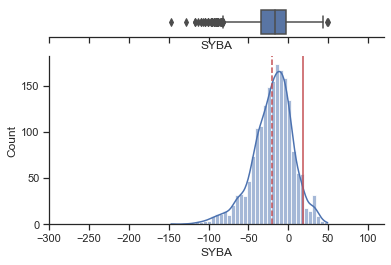

In [35]:
sns.set(style="ticks")

for i,Family in enumerate(parent_data['molecule']):
    fam = parent_data['molecule'][i]
    atom_thresh = parent_data['n_atoms'][i] - 10
    parent_natoms = parent_data['n_atoms'][i]
    
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    
    df_filter = pd.DataFrame(the_data).query("Family == @fam").query("N_atoms >= (@parent_natoms - @atom_thresh)").query("fp_scores != 1")#.query("shell_type == 'closed'")

    sns.boxplot(data=df_filter,x='SYBA', ax=ax_box)
    sns.histplot(data=df_filter,x='SYBA', ax=ax_hist, kde=True)
    
    ax_box.set_xlabel("SYBA")
    ax_hist.set_xlabel("SYBA")
    
    plt.axvline(x=parent_data['SYBA'][i],color='r',label='Parent Molecule')
    plt.axvline(x=-20,label='SYBA -20',color='r',ls='--')

    ax_box.set(yticks=[])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)
    plt.xlim(-300, 120)
#     plt.ylim(0, 400)
    plt.savefig('Images/sns_plt_'+fam+'_SYBA.png', bbox_inches='tight',dpi=img_dpi)

# number so far

In [16]:
all_smi_data = pickle.load(open("all_smi_data.pkl",'rb'))

PXZ-TRZ [135000, 3768, 3483, 2724, 896]
TXO-PhCz [115000, 3324, 2970, 2256, 1122]
TXO-TPA [135000, 3209, 2813, 2146, 1208]
GOBVUP [95000, 2246, 2086, 1609, 176]
TUFWAS [105000, 3025, 2830, 2297, 665]
YAFNOI [105000, 1924, 1783, 1409, 684]


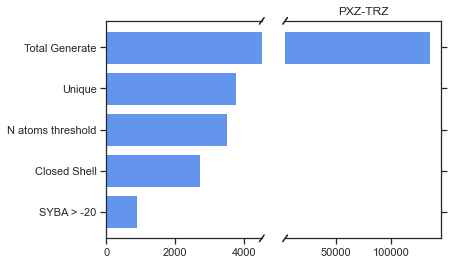

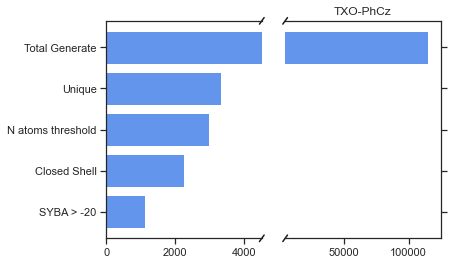

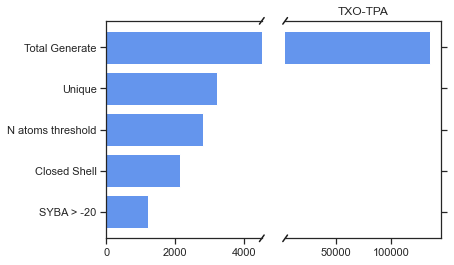

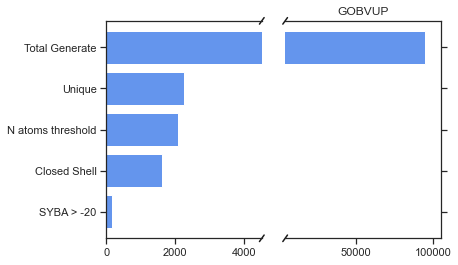

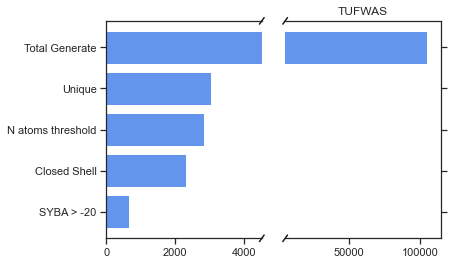

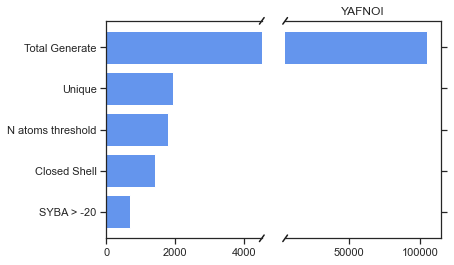

In [17]:
for i,fam in enumerate(parent_data['molecule']):
    
    
    fig, (ax1,ax2) = plt.subplots(1, 2, sharey=True)
    color = 'cornflowerblue'

    tot_gen = len(all_smi_data[fam])
    
    df = pd.DataFrame(the_data).query('Family == @fam').query("fp_scores != 1")
    unique_smi = df.shape[0]
    
    thresh = parent_data['n_atoms'][i] - 10
    f1 = df.query("N_atoms >= @thresh").shape[0]
    
    
    f2 = df.query("N_atoms >= @thresh").query("shell_type == 'closed'").shape[0]
    f3 = df.query("N_atoms >= @thresh").query("shell_type == 'closed'").query('SYBA >= -20').shape[0]

    x = [0,-1,-2,-3,-4]
    y = [tot_gen,unique_smi, f1, f2, f3]

    ax1.barh(x,y,color=color)
    ax2.barh(x,y,color=color)
    
    ax1.set_xlim(0,4500) # most of the data
    ax2.set_xlim(4500,max(y)+10000) # outliers only
    
    # hide the spines between ax and ax2
    ax1.spines['right'].set_visible(False)
    ax2.spines['left'].set_visible(False)
    ax1.yaxis.tick_left()
#     ax1.tick_params(labeltop='off') # don't put tick labels at the top 
    ax2.yaxis.tick_right()
    
    # Make the spacing between the two axes a bit smaller
    plt.subplots_adjust(wspace=0.15)
    
    d = .015 # how big to make the diagonal lines in axes coordinates
    # arguments to pass plot, just so we don't keep repeating them
    kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
    ax1.plot((1-d,1+d),(-d,+d), **kwargs) # top-left diagonal
    ax1.plot((1-d,1+d),(1-d,1+d), **kwargs) # bottom-left diagonal

    kwargs.update(transform=ax2.transAxes) # switch to the bottom axes
    ax2.plot((-d,d),(-d,+d), **kwargs) # top-right diagonal
    ax2.plot((-d,d),(1-d,1+d), **kwargs) # bottom-right diagonal

    ax1.set_yticks(x)
    ax1.set_yticklabels(['Total Generate','Unique','N atoms threshold','Closed Shell','SYBA > -20'])
    
    plt.title(fam)
    print(fam,y)
plt.show()

In [18]:
thresh

15

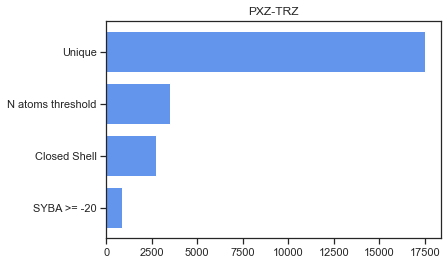

['Unique', 'N atoms threshold', 'Closed Shell', 'SYBA >= -20'] 
 [17496, 3483, 2724, 896]


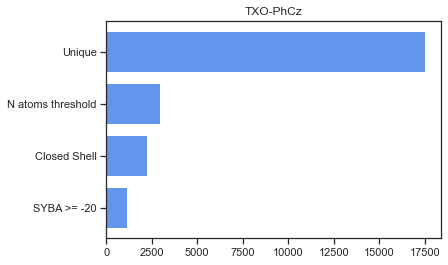

['Unique', 'N atoms threshold', 'Closed Shell', 'SYBA >= -20'] 
 [17496, 2970, 2256, 1122]


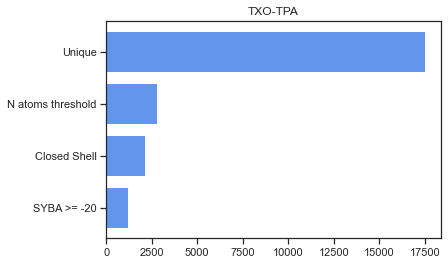

['Unique', 'N atoms threshold', 'Closed Shell', 'SYBA >= -20'] 
 [17496, 2813, 2146, 1208]


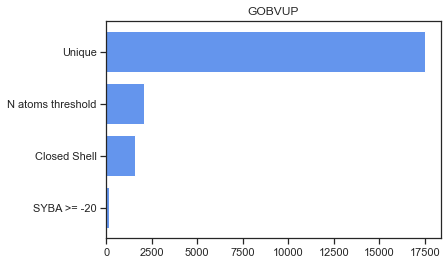

['Unique', 'N atoms threshold', 'Closed Shell', 'SYBA >= -20'] 
 [17496, 2086, 1609, 176]


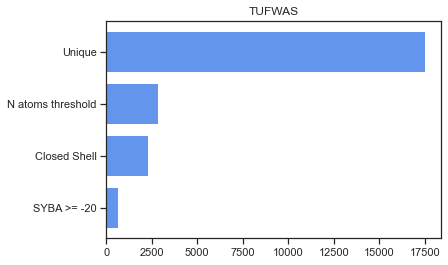

['Unique', 'N atoms threshold', 'Closed Shell', 'SYBA >= -20'] 
 [17496, 2830, 2297, 665]


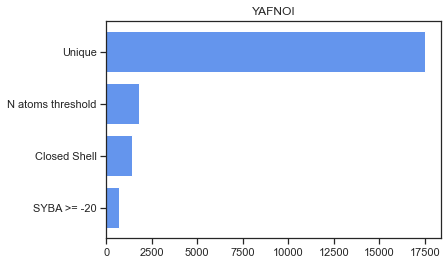

['Unique', 'N atoms threshold', 'Closed Shell', 'SYBA >= -20'] 
 [17496, 1783, 1409, 684]


In [19]:
df = pd.DataFrame(the_data).query("fp_scores != 1")
for i,fam in enumerate(parent_data['molecule']):
    
    thresh = parent_data['n_atoms'][i] - 10
    N_unique_mols = df.shape[0]
    N_atoms = df.query("Family == @fam").query("N_atoms >= @thresh").shape[0]
    N_closed = df.query("Family == @fam").query("N_atoms >= @thresh").query("shell_type == 'closed'").shape[0]
    N_syba = df.query("Family == @fam").query("N_atoms >= @thresh").query("shell_type == 'closed'").query('SYBA >= -20').shape[0]
    
    x = [0,-1,-2,-3]
    y = [N_unique_mols,N_atoms, N_closed, N_syba]
    y_ticks_labels = ['Unique','N atoms threshold','Closed Shell','SYBA >= -20']
    
    
    
    plt.barh(x,y,color='cornflowerblue')
    plt.yticks(x,y_ticks_labels)
    plt.title(fam)
    plt.show()
    print(y_ticks_labels, '\n',y)

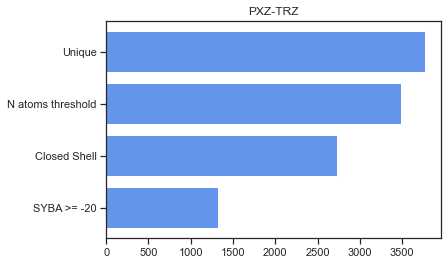

['Unique', 'N atoms threshold', 'Closed Shell', 'SYBA >= -20'] 
 [3768, 3483, 2724, 1320]


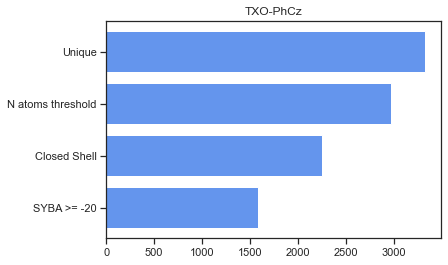

['Unique', 'N atoms threshold', 'Closed Shell', 'SYBA >= -20'] 
 [3324, 2970, 2256, 1580]


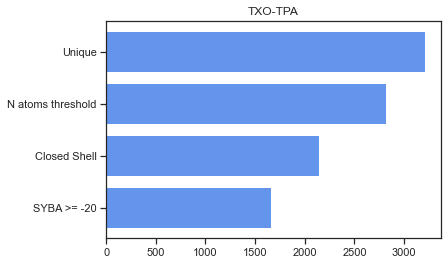

['Unique', 'N atoms threshold', 'Closed Shell', 'SYBA >= -20'] 
 [3209, 2813, 2146, 1659]


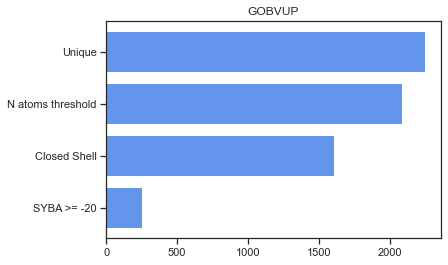

['Unique', 'N atoms threshold', 'Closed Shell', 'SYBA >= -20'] 
 [2246, 2086, 1609, 256]


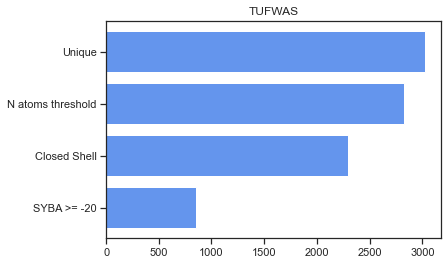

['Unique', 'N atoms threshold', 'Closed Shell', 'SYBA >= -20'] 
 [3025, 2830, 2297, 852]


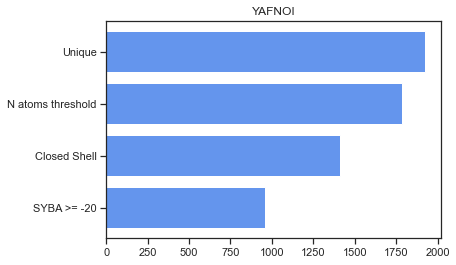

['Unique', 'N atoms threshold', 'Closed Shell', 'SYBA >= -20'] 
 [1924, 1783, 1409, 957]


In [21]:
df = pd.DataFrame(the_data).query("fp_scores != 1")
for i,fam in enumerate(parent_data['molecule']):
    
    thresh = parent_data['n_atoms'][i] - 10
    N_unique_mols = df.query("Family == @fam").shape[0]
    N_atoms = df.query("Family == @fam").query("N_atoms >= @thresh").shape[0]
    N_closed = df.query("Family == @fam").query("N_atoms >= @thresh").query("shell_type == 'closed'").shape[0]
    N_syba = df.query("Family == @fam").query("N_atoms >= @thresh").query('SYBA >= -20').shape[0]
    
    x = [0,-1,-2,-3]
    y = [N_unique_mols,N_atoms, N_closed, N_syba]
    y_ticks_labels = ['Unique','N atoms threshold','Closed Shell','SYBA >= -20']
    
    
    
    plt.barh(x,y,color='cornflowerblue')
    plt.yticks(x,y_ticks_labels)
    plt.title(fam)
    plt.show()
    print(y_ticks_labels, '\n',y)

In [27]:
pickle.dump(the_data, open("the_data_NEW_2.pkl",'wb'))